In [1]:
# Importing Libraries 
import pandas as pd
import numpy as np

In [2]:
glass = pd.read_csv("glass.csv")

In [3]:
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
glass['Type'].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

In [5]:
# Training and Test data using 
from sklearn.model_selection import train_test_split
train,test = train_test_split(glass,test_size = 0.2) # 0.2 => 20 percent of entire data 

In [6]:
# KNN using sklearn 
# Importing Knn algorithm from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier as KNC

# for 3 nearest neighbours 
neigh = KNC(n_neighbors= 3)
x_train = train.iloc[:,0:9]
y_train=train.iloc[:,9]
# Fitting with training data 
neigh.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [7]:
# for 5 nearest neighbours
neigh = KNC(n_neighbors=5)

# fitting with training data
neigh.fit(train.iloc[:,0:9],train.iloc[:,9])
x_train = train.iloc[:,0:9]
y_train= train.iloc[:,9]
y_pred= neigh.predict(x_train)
# train accuracy 
train_acc = np.mean(y_pred==y_train)
print(train_acc)

# test accuracy
test_acc = np.mean(neigh.predict(test.iloc[:,0:9])==test.iloc[:,9])
print(test_acc)

0.7368421052631579
0.6976744186046512


In [8]:
# creating empty list variable 
acc = []

# running KNN algorithm for 3 to 50 nearest neighbours(odd numbers) and 
# storing the accuracy values 
 
for i in range(3,50,2):
    neigh = KNC(n_neighbors=i)
    neigh.fit(train.iloc[:,0:9],train.iloc[:,9])
    train_acc = np.mean(neigh.predict(train.iloc[:,0:9])==train.iloc[:,9])
    test_acc = np.mean(neigh.predict(test.iloc[:,0:9])==test.iloc[:,9])
    acc.append([train_acc,test_acc])

In [9]:
acc

[[0.8187134502923976, 0.7674418604651163],
 [0.7368421052631579, 0.6976744186046512],
 [0.695906432748538, 0.6744186046511628],
 [0.6900584795321637, 0.6046511627906976],
 [0.6432748538011696, 0.6511627906976745],
 [0.6432748538011696, 0.6976744186046512],
 [0.6608187134502924, 0.6744186046511628],
 [0.672514619883041, 0.6511627906976745],
 [0.6608187134502924, 0.6511627906976745],
 [0.6608187134502924, 0.627906976744186],
 [0.6374269005847953, 0.6511627906976745],
 [0.6374269005847953, 0.6511627906976745],
 [0.6140350877192983, 0.6511627906976745],
 [0.6140350877192983, 0.6511627906976745],
 [0.6081871345029239, 0.6744186046511628],
 [0.6081871345029239, 0.6744186046511628],
 [0.6081871345029239, 0.6511627906976745],
 [0.5964912280701754, 0.627906976744186],
 [0.5906432748538012, 0.5813953488372093],
 [0.5847953216374269, 0.5813953488372093],
 [0.5847953216374269, 0.5813953488372093],
 [0.5847953216374269, 0.5813953488372093],
 [0.5730994152046783, 0.5581395348837209],
 [0.56725146198

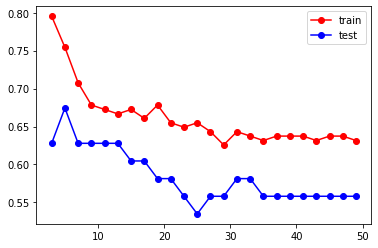

In [66]:
import matplotlib.pyplot as plt # library to do visualizations 

# train accuracy plot 
plt.plot(np.arange(3,50,2),[i[0] for i in acc],"ro-")

# test accuracy plot
plt.plot(np.arange(3,50,2),[i[1] for i in acc],"bo-")


plt.legend(["train","test"])
plt.show()

from above if we see that our model have good accoracy from 1 to 10 then for accurate vaue of k we will create loop from 1 to 10

In [83]:
# creating empty list variable 
acc1 = []

# running KNN algorithm for 3 to 50 nearest neighbours(odd numbers) and 
# storing the accuracy values 
 
for i in range(1,12,2):
    neigh = KNC(n_neighbors=i)
    neigh.fit(train.iloc[:,0:9],train.iloc[:,9])
    train_acc1 = np.mean(neigh.predict(train.iloc[:,0:9])==train.iloc[:,9])
    test_acc1 = np.mean(neigh.predict(test.iloc[:,0:9])==test.iloc[:,9])
    acc1.append([train_acc1,test_acc1])

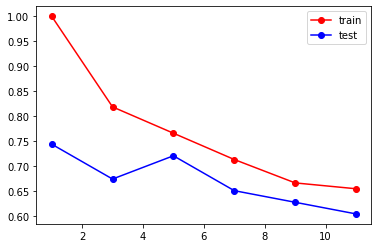

In [84]:
import matplotlib.pyplot as plt # library to do visualizations 

# train accuracy plot 
plt.plot(np.arange(1,12,2),[i[0] for i in acc1],"ro-")

# test accuracy plot
plt.plot(np.arange(1,12,2),[i[1] for i in acc1],"bo-")


plt.legend(["train","test"])
plt.show()

so above graph shows that k=5 will be the best k value for the least contrast in tran and test accuracy

# we will try to decrease diffrence between train and test accuracy by k folded method

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import model_selection

In [58]:
glass1 = pd.read_csv("glass.csv")

split of data into dpendent and independent parts

In [59]:
y1=glass1.iloc[:,9] #9th column is our dependent variable
inputvariables1=list(glass1) #it conatain list of all columns
del inputvariables1[9] #from that list we deleted 7th column
x1=glass1[inputvariables1] #from rest of column we store data into x

In [60]:
# split the data set into train and test
x_1, x_test, y_1, y_test = model_selection.train_test_split(x1, y1, test_size=0.3, random_state=0)

# split the train data set into cross validation train and cross validation test
x_tr, x_cv, y_tr, y_cv = model_selection.train_test_split(x_1, y_1, test_size=0.3)

for i in range(1,30,2):
    # instantiate learning model (k = 30)
    knn = KNeighborsClassifier(n_neighbors=i)

    # fitting the model on crossvalidation train
    knn.fit(x_tr, y_tr)

    # predict the response on the crossvalidation train
    pred1 = knn.predict(x_cv)

    # evaluate CV accuracy
    acc1 = accuracy_score(y_cv, pred1, normalize=True) * float(100)
    print('\nCV accuracy for k = %d is %d%%' % (i, acc1))
    

    


CV accuracy for k = 1 is 68%

CV accuracy for k = 3 is 60%

CV accuracy for k = 5 is 57%

CV accuracy for k = 7 is 57%

CV accuracy for k = 9 is 55%

CV accuracy for k = 11 is 55%

CV accuracy for k = 13 is 55%

CV accuracy for k = 15 is 55%

CV accuracy for k = 17 is 57%

CV accuracy for k = 19 is 57%

CV accuracy for k = 21 is 55%

CV accuracy for k = 23 is 55%

CV accuracy for k = 25 is 51%

CV accuracy for k = 27 is 53%

CV accuracy for k = 29 is 51%


so we are getting maximum accuracy fro k=3

so we will make final model for k=3

In [61]:
knn_final= KNeighborsClassifier(3)
knn_final.fit(x_tr,y_tr)
pred_test= knn_final.predict(x_test)
acc_test= accuracy_score(y_test, pred_test, normalize=True) * float(100)
print('\n****Test accuracy for k =3  is %d%%' % (acc_test))


****Test accuracy for k =3  is 67%
